# 吴恩达深度学习课程作业L1W4

* 构建多层隐藏层神经网络

## HW1参考

1. [视频链接](https://mooc.study.163.com/university/deeplearning_ai#/c)
2. [作业链接](https://www.heywhale.com/mw/project/5dd798fbf41512002ceb38de)
3. [作业链接2](https://github.com/suqi/deeplearning_andrewng)

## HW2参考

1. [视频链接](https://mooc.study.163.com/university/deeplearning_ai#/c)
2. [作业链接](https://github.com/JudasDie/deeplearning.ai)
3. [作业链接2](https://github.com/suqi/deeplearning_andrewng)

## 1-导入模块

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load_extension
%load_ext autoreload  
# Then your module will be auto-reloaded by default
%autoreload 2  

np.random.seed(1)

In [2]:
root_path = './深度学习之吴恩达课程作业3/'

## 2-一些函数

### 2.1-testCases_v3.py

In [3]:
def func_linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
                 [-1.62328545, 0.64667545],
                 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

def func_linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
                 [-1.62328545, 0.64667545],
                 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def func_L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
                 [-1.62328545, 0.64667545],
                 [-1.74314104, -0.59664964]])
    parameters = {
        'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
                        [-1.07296862,  0.86540763, -2.3015387 ]]),
        'W2': np.array([[ 1.74481176, -0.7612069 ]]),
        'b1': np.array([[ 0.], [ 0.]]),
        'b2': np.array([[ 0.]])
    }
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return X, parameters

def func_compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

def func_linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def func_linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

def func_L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def func_update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
    'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
        'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
    'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
    'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
    'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
    'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
    'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
    'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
    'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
    'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
    'db1': 0.75937676204411464,
    'db2': 0.86163759922811056,
    'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads


def func_L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

def func_print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA2"])) # this is done on purpose to be consistent with lecture where we normally start with A0
    # in this implementation we started with A1, hence we bump it up by 1. 

### 2.2-dnn_utils_v2.py

In [4]:
def func_sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def func_relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def func_relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def func_sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## 3-主要框架

1. 初始化参数：$L$层神经网络
2. 实现前向传播模块
3. 计算损失
4. 实现反向传播模块
5. 更新参数

* 如下图

![final_outline.png](./深度学习之吴恩达课程作业3/final_outline.png)

* 注意
    1. 每一个前向传播对应一个后向传播，所以要将前向传播的值cache，以便后向传播计算梯度

## 4-参数初始化

1. 实现2层神经网络的参数初始化
2. 实现$L$层神经网络的参数初始化

![relu](./深度学习之吴恩达课程作业3/relu.png)

### 4.1-2层神经网络

* 模型结构是：*LINEAR -> RELU -> LINEAR -> SIGMOID*
* 用`np.random.randn(shape)*0.01`来随机初始化参数
* 用`np.zeros(shape)`来初始化bias

In [5]:
def func_2_layers_initialize_parameters(n_x, n_h, n_y):
    """
    2层神经网络的参数初始化
    :param n_x: size of the input layer
    :param n_h: size of the hidden layer
    :param n_y: size of the output layer
    :return parameters: python dictionary containing your parameters:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

In [6]:
parameters = func_2_layers_initialize_parameters(3, 2, 1)

In [7]:
parameters

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172],
        [-0.01072969,  0.00865408, -0.02301539]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[ 0.01744812, -0.00761207]]),
 'b2': array([[0.]])}

### 3.2-L层神经网络

* 以输入$X$大小为(12288,209)(m=209)为例，各层参数如下表：

| - | shape of W | shape of b | activation | shape of activation |
|:---| :--- | :---| :--- | :--- |
|layer 1 | $(n^{[1]},12288)$ | $(n^{[1]},1)$ | $Z^{[1]} = W^{[1]}  X + b^{[1]}$ | $(n^{[1]},209)$ |
|layer 2 | $(n^{[2]}, n^{[1]})$ | $(n^{[2]},1)$ | $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ | $(n^{[2]}, 209)$ | 
| ... | ... | ... | ... | ... |
| layer L-1 | $(n^{[L-1]}, n^{[L-2]})$ | $(n^{[L-1]}, 1)$ | $Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ | $(n^{[L-1]}, 209)$ |
| layer L | $(n^{[L]}, n^{[L-1]})$ |  $(n^{[L]}, 1)$ | $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$ | $(n^{[L]}, 209)$ |


* 在python中，合理运用broadcast机制，如下：

$$ 
W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}
$$

Then $WX + b$ will be:

$$ 
WX + b = \begin{bmatrix}
(ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
(ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
(pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}
$$

* 练习
    1. 实现L层神经网络参数初始化
* 说明
    1. 模型结构为：* [LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID *
    2. 使用`np.random.randn(shape)*0.01`初始化$W$
    3. 使用`np.zeros(shape)`初始化$b$
    4. 将$n^{[l]}$存储在`layer_dims`中，例如`layer_dims=[2,4,1]`意味着2个输入特征，一个隐藏层4个units，1个输出
* <font size=5 color=red>强调</font>：
    1. 这里`/ np.sqrt(layer_dims[layer-1])`很重要，如果还是`*0.01`，会导致模型cost降不下去

In [8]:
def func_L_layers_initialize_parameters(layer_dims):
    """
    L层神经网络参数初始化
    :param layer_dims: python array (list) containing the dimensions of each layer in our network
    
    :return: 
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    
    # 这里/ np.sqrt(layer_dims[layer-1])很重要，如果还是*0.01，会导致模型cost降不下去
    for layer in range(1, L):
        parameters['W' + str(layer)] = np.random.randn(layer_dims[layer], layer_dims[layer-1]) / np.sqrt(layer_dims[layer-1]) # * 0.01
        parameters['b' + str(layer)] = np.zeros((layer_dims[layer], 1))
        
        assert(parameters['W' + str(layer)].shape == (layer_dims[layer], layer_dims[layer-1]))
        assert(parameters['b' + str(layer)].shape == (layer_dims[layer], 1))
    return parameters

In [9]:
parameters = func_L_layers_initialize_parameters(layer_dims=[5, 4, 3])

In [10]:
parameters

{'W1': array([[ 0.72642933, -0.27358579, -0.23620559, -0.47984616,  0.38702206],
        [-1.0292794 ,  0.78030354, -0.34042208,  0.14267862, -0.11152182],
        [ 0.65387455, -0.92132293, -0.14418936, -0.17175433,  0.50703711],
        [-0.49188633, -0.07711224, -0.39259022,  0.01887856,  0.26064289]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.55030959,  0.57236185,  0.45079536,  0.25124717],
        [ 0.45042797, -0.34186393, -0.06144511, -0.46788472],
        [-0.13394404,  0.26517773, -0.34583038, -0.19837676]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

## 5-forward propagation

### 5.1-linear forward

* 公式

$$
Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} \\
A^{[0]} = X
$$

* 练习
    1. 实现`func_linear_forward()`函数

In [11]:
def func_linear_forward(A, W, b):
    """
    linear forward
    :param A:
    :param W:
    :param b:
    :return Z,chche:
        Z -- the input of the activation function, also called pre-activation parameter 
        cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

In [12]:
A, W, b = func_linear_forward_test_case()

In [13]:
print(A.shape, W.shape, b.shape)

(3, 2) (1, 3) (1, 1)


In [14]:
Z, linear_cache = func_linear_forward(A, W, b)

In [15]:
Z

array([[ 3.26295337, -1.23429987]])

In [16]:
linear_cache

(array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ]]),
 array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]),
 array([[-0.24937038]]))

### 5.2-linear activation forward

* activation method:
    1. sigmoid
    2. relu
* 公式

    $$
    A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})
    $$

In [17]:
def func_linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    :param A_prev: activations from previous layer (or input data): (size of previous layer, number of examples)
    :param W: weights matrix: numpy array of shape (size of current layer, size of previous layer)
    :param b: bias vector, numpy array of shape (size of the current layer, 1)
    :param activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    :return:
        A -- the output of the activation function, also called the post-activation value 
        cache -- a python dictionary containing "linear_cache" and "activation_cache";
                 stored for computing the backward pass efficiently
    """
    Z, linear_cache = func_linear_forward(A_prev, W, b)
    if activation == 'sigmoid':
        A, activation_cache = func_sigmoid(Z)
    elif activation == 'relu':
        A, activation_cache = func_relu(Z)
    else:
        raise ValueError('activation param')
    
    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

In [18]:
A_prev, W, b = func_linear_activation_forward_test_case()

In [19]:
print(A_prev.shape, W.shape, b.shape)

(3, 2) (1, 3) (1, 1)


In [20]:
A, linear_activation_cache = func_linear_activation_forward(A_prev, W, b, activation='sigmoid')

In [21]:
A

array([[0.96890023, 0.11013289]])

In [22]:
linear_activation_cache

((array([[-0.41675785, -0.05626683],
         [-2.1361961 ,  1.64027081],
         [-1.79343559, -0.84174737]]),
  array([[ 0.50288142, -1.24528809, -1.05795222]]),
  array([[-0.90900761]])),
 array([[ 3.43896131, -2.08938436]]))

In [23]:
A, linear_activation_cache = func_linear_activation_forward(A_prev, W, b, activation='relu')

In [24]:
A

array([[3.43896131, 0.        ]])

In [25]:
linear_activation_cache

((array([[-0.41675785, -0.05626683],
         [-2.1361961 ,  1.64027081],
         [-1.79343559, -0.84174737]]),
  array([[ 0.50288142, -1.24528809, -1.05795222]]),
  array([[-0.90900761]])),
 array([[ 3.43896131, -2.08938436]]))

### 5.3-L layer forward

* 如图：

![model_architecture_kiank.png](./深度学习之吴恩达课程作业3/model_architecture_kiank.png)

* 练习：
    1. 实现`func_L_model_forward()`

In [26]:
def func_L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    :param X -- data, numpy array of shape (input size, number of examples)
    :param parameters -- output of initialize_parameters_deep()
    
    :return:
        AL -- last post-activation value
        caches -- list of caches containing:
                    every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                    the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2
    
    for layer in range(1, L):
        A_prev = A
        W, b = parameters['W'+str(layer)], parameters['b'+str(layer)]
        A, cache = func_linear_activation_forward(A_prev, W, b, 'relu')
        caches.append(cache)
    
    A_prev = A
    layer = L
    W, b = parameters['W'+str(layer)], parameters['b'+str(layer)]
    A, cache = func_linear_activation_forward(A_prev, W, b, 'sigmoid')
    caches.append(cache)
    
    assert(A.shape == (1, X.shape[1]))
    return A, caches

In [27]:
X, parameters = func_L_model_forward_test_case_2hidden()

In [28]:
X

array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
       [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
       [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
       [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
       [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]])

In [29]:
parameters

{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
        [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
        [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
        [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
 'b1': array([[ 1.38503523],
        [-0.51962709],
        [-0.78015214],
        [ 0.95560959]]),
 'W2': array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
        [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
        [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]),
 'b2': array([[ 1.50278553],
        [-0.59545972],
        [ 0.52834106]]),
 'W3': array([[ 0.9398248 ,  0.42628539, -0.75815703]]),
 'b3': array([[-0.16236698]])}

In [30]:
A, caches = func_L_model_forward(X, parameters)

In [31]:
A

array([[0.03921668, 0.70498921, 0.19734387, 0.04728177]])

In [32]:
caches

[((array([[-0.31178367,  0.72900392,  0.21782079, -0.8990918 ],
          [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
          [ 1.63929108, -0.4298936 ,  2.63128056,  0.60182225],
          [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
          [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]]),
   array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
          [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
          [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
          [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]),
   array([[ 1.38503523],
          [-0.51962709],
          [-0.78015214],
          [ 0.95560959]])),
  array([[-5.23825714,  3.18040136,  0.4074501 , -1.88612721],
         [-2.77358234, -0.56177316,  3.18141623, -0.99209432],
         [ 4.18500916, -1.78006909, -0.14502619,  2.72141638],
         [ 5.05850802, -1.25674082, -3.54566654,  3.82321852]])),
 ((array([

## 6-损失函数

* cross entropy公式

$$
-\frac{1}{m} \sum\limits_{i = 1}^{m} \left(y^{(i)}\log(a^{[L] (i)}) + (1-y^{(i)})\log(1- a^{[L](i)})\right)
$$

In [33]:
def func_compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    :param AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    :param Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    :return:
        cost -- cross-entropy cost
    """
    m = Y.shape[1]
    
#     cost = -1 / m * np.sum(np.multiply(Y, np.log(AL))+np.multiply(1-Y, np.log(1-AL)))
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    return cost

In [34]:
Y, AL = func_compute_cost_test_case()

In [35]:
cost = func_compute_cost(AL, Y)

In [36]:
cost

array(0.4149316)

## 7-backward propagation

* 反向传播模块是为了计算梯度，从而更新参数
* 反向传播图

<img src="./深度学习之吴恩达课程作业3/backprop.png">
<caption><center> **Figure 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.*  </center></caption>

* 反向传播公式

$$
\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}}  \\
dW^{[1]} = \frac{\partial \mathcal{L}}{\partial W^{[1]}} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}  \\
db^{[1]} = \frac{\partial \mathcal{L}}{\partial b^{[1]}} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}
$$

* 练习
    1. 实现linear backward
    2. 实现激活函数的backward
    3. 实现L层的backward

### 7.1-linear backward

* 对于layer l，
    1. linear forward是：$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$
    2. linear backward是：$dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$
* 如下图

    <img src="./深度学习之吴恩达课程作业3/linearback_kiank.png" style="width:250px;height:300px;">
    <caption><center> **Figure 4** </center></caption>

* 求解$(dW^{[l]}, db^{[l]} dA^{[l-1]})$如下：

    $$
    dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \\
    db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} \\
    dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}
    $$
* 解释：
    1. $dW^{[l]}$携带$1/m$是因为一共$m$个样本，每个样本都会计算一次损失以及$dW^{[l]}$
    2. $W^{[l]}$的维度为$(n^{[l]}, n^{[l-1]})$
    3. $A^{[l-1]}$的维度为$(n^{[l-1]}, m)$，故其导数不携带$1/m$
* 练习：
    1. 实现`func_linear_backward()`函数

In [37]:
def func_linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    :param dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    :param cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    :return:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1 / m * np.dot(dZ, A_prev.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)  # axis=1是行记录求和
    dA_prev = np.dot(W.T, dZ)
    
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    assert(dA_prev.shape == A_prev.shape)
    return dA_prev, dW, db

In [38]:
dZ, linear_cache = func_linear_backward_test_case()

In [39]:
dZ.shape

(1, 2)

In [40]:
for i in linear_cache:
    print(i.shape)

(3, 2)
(1, 3)
(1, 1)


In [41]:
dA_prev, dW, db = func_linear_backward(dZ, linear_cache)

In [42]:
dA_prev

array([[ 0.51822968, -0.19517421],
       [-0.40506361,  0.15255393],
       [ 2.37496825, -0.89445391]])

In [43]:
dW

array([[-0.10076895,  1.40685096,  1.64992505]])

In [44]:
db

array([[0.50629448]])

### 7.2-linear activation backward

* 公式

$$
dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})
$$

* 练习
    1. 实现`func_linear_activation_backward()`函数

In [45]:
def func_linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    :param dA -- post-activation gradient for current layer l 
    :param cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    :param activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    :returns
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == 'relu':
        dZ = func_relu_backward(dA, activation_cache)
    elif activation == 'sigmoid':
        dZ = func_sigmoid_backward(dA, activation_cache)
    else:
        raise ValueError('activation param')
    dA_prev, dW, db = func_linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [46]:
AL, linear_activation_cache = func_linear_activation_backward_test_case()

In [47]:
AL

array([[-0.41675785, -0.05626683]])

In [48]:
linear_activation_cache

((array([[-2.1361961 ,  1.64027081],
         [-1.79343559, -0.84174737],
         [ 0.50288142, -1.24528809]]),
  array([[-1.05795222, -0.90900761,  0.55145404]]),
  array([[2.29220801]])),
 array([[ 0.04153939, -1.11792545]]))

In [49]:
dA_prev, dW, db = func_linear_activation_backward(AL, linear_activation_cache, activation='sigmoid')

In [50]:
dA_prev, dW, db

(array([[ 0.11017994,  0.01105339],
        [ 0.09466817,  0.00949723],
        [-0.05743092, -0.00576154]]),
 array([[ 0.10266786,  0.09778551, -0.01968084]]),
 array([[-0.05729622]]))

In [51]:
dA_prev, dW, db = func_linear_activation_backward(AL, linear_activation_cache, activation='relu')

In [52]:
dA_prev, dW, db

(array([[ 0.44090989,  0.        ],
        [ 0.37883606,  0.        ],
        [-0.2298228 ,  0.        ]]),
 array([[ 0.44513824,  0.37371418, -0.10478989]]),
 array([[-0.20837892]]))

### 7.3-L layer backward

* 结构图

<img src="./深度学习之吴恩达课程作业3/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

<img src="./深度学习之吴恩达课程作业3/mn_backward1.jpg" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass 截图  </center></caption>

* output层的梯度

    `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$=`- (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))`

* 练习
    1. 实现`func_L_model_backward()`函数

In [53]:
def func_L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    :param AL -- probability vector, output of the forward propagation (L_model_forward())
    :param Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    :param caches -- list of caches containing:
                    every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                    the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    :return:
        grads -- A dictionary with the gradients
                 grads["dA" + str(l)] = ... 
                 grads["dW" + str(l)] = ...
                 grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    cur_cache = caches[L-1]
    grads['dA' + str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = func_linear_activation_backward(dAL, cur_cache, activation='sigmoid')
    
    for layer in reversed(range(L-1)):
        cur_cache = caches[layer]
        dA_prev_tmp, dW_tmp, db_tmp = func_linear_activation_backward(grads["dA"+str(layer+1)], cur_cache, activation='relu')
        grads['dA'+str(layer)] = dA_prev_tmp
        grads['dW'+str(layer+1)] = dW_tmp
        grads['db'+str(layer+1)] = db_tmp
    
#     current_cache = caches[L-1]
#     grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = func_linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
#     for l in reversed(range(L-1)):
#         # lth layer: (RELU -> LINEAR) gradients.
#         current_cache = caches[l]
#         dA_prev_temp, dW_temp, db_temp = func_linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
#         grads["dA" + str(l + 1)] = dA_prev_temp
#         grads["dW" + str(l + 1)] = dW_temp
#         grads["db" + str(l + 1)] = db_temp
    
    return grads

In [54]:
AL, Y_assess, caches = func_L_model_backward_test_case()

In [55]:
AL, Y_assess, caches

(array([[1.78862847, 0.43650985]]),
 array([[1, 0]]),
 (((array([[ 0.09649747, -1.8634927 ],
           [-0.2773882 , -0.35475898],
           [-0.08274148, -0.62700068],
           [-0.04381817, -0.47721803]]),
    array([[-1.31386475,  0.88462238,  0.88131804,  1.70957306],
           [ 0.05003364, -0.40467741, -0.54535995, -1.54647732],
           [ 0.98236743, -1.10106763, -1.18504653, -0.2056499 ]]),
    array([[ 1.48614836],
           [ 0.23671627],
           [-1.02378514]])),
   array([[-0.7129932 ,  0.62524497],
          [-0.16051336, -0.76883635],
          [-0.23003072,  0.74505627]])),
  ((array([[ 1.97611078, -1.24412333],
           [-0.62641691, -0.80376609],
           [-2.41908317, -0.92379202]]),
    array([[-1.02387576,  1.12397796, -0.13191423]]),
    array([[-1.62328545]])),
   array([[ 0.64667545, -0.35627076]]))))

In [56]:
grads = func_L_model_backward(AL, Y_assess, caches)

In [57]:
grads

{'dA1': array([[ 0.12913162, -0.44014127],
        [-0.14175655,  0.48317296],
        [ 0.01663708, -0.05670698]]),
 'dW2': array([[-0.39202432, -0.13325855, -0.04601089]]),
 'db2': array([[0.15187861]]),
 'dA0': array([[ 0.        ,  0.52257901],
        [ 0.        , -0.3269206 ],
        [ 0.        , -0.32070404],
        [ 0.        , -0.74079187]]),
 'dW1': array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
        [0.        , 0.        , 0.        , 0.        ],
        [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]]),
 'db1': array([[-0.22007063],
        [ 0.        ],
        [-0.02835349]])}

### 7.4-更新参数

* 更新公式

$$
W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \\
b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}
$$

* 练习
    1. 实现`func_update_parameters()`函数

In [58]:
def func_update_parameters(parameters, grads, lr):
    """
    Update parameters using gradient descent
    
    :param parameters -- python dictionary containing your parameters 
    :param grads -- python dictionary containing your gradients, output of L_model_backward
    :param lr: learning rate
    :return:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
    """
    L = len(parameters) // 2
    
    for layer in range(1, L+1):
        parameters['W'+str(layer)] = parameters['W'+str(layer)] - lr * grads['dW' + str(layer)]
        parameters['b'+str(layer)] = parameters['b'+str(layer)] - lr * grads['db' + str(layer)]
    
    return parameters

In [59]:
parameters, grads = func_update_parameters_test_case()

In [60]:
parameters, grads

({'W1': array([[-0.41675785, -0.05626683, -2.1361961 ,  1.64027081],
         [-1.79343559, -0.84174737,  0.50288142, -1.24528809],
         [-1.05795222, -0.90900761,  0.55145404,  2.29220801]]),
  'b1': array([[ 0.04153939],
         [-1.11792545],
         [ 0.53905832]]),
  'W2': array([[-0.5961597 , -0.0191305 ,  1.17500122]]),
  'b2': array([[-0.74787095]])},
 {'dW1': array([[ 1.78862847,  0.43650985,  0.09649747, -1.8634927 ],
         [-0.2773882 , -0.35475898, -0.08274148, -0.62700068],
         [-0.04381817, -0.47721803, -1.31386475,  0.88462238]]),
  'db1': array([[0.88131804],
         [1.70957306],
         [0.05003364]]),
  'dW2': array([[-0.40467741, -0.54535995, -1.54647732]]),
  'db2': array([[0.98236743]])})

In [61]:
parameters = func_update_parameters(parameters, grads, 0.1)

In [62]:
parameters

{'W1': array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],
        [-1.76569676, -0.80627147,  0.51115557, -1.18258802],
        [-1.0535704 , -0.86128581,  0.68284052,  2.20374577]]),
 'b1': array([[-0.04659241],
        [-1.28888275],
        [ 0.53405496]]),
 'W2': array([[-0.55569196,  0.0354055 ,  1.32964895]]),
 'b2': array([[-0.84610769]])}

### 7.5-预测

In [63]:
def func_predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    :param X -- data set of examples you would like to label
    :param parameters -- parameters of the trained model
    :return:
        p -- predictions for the given dataset X
    """
    m = X.shape[1]
    L = len(parameters) // 2
    p = np.zeros((1, m))
    
    probas, caches = func_L_model_forward(X, parameters)
    
    for i in range(probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    
    print('acc: {}'.format(np.sum(p==y)/m))
    return p

## 8-整合到model

### 8.1-two layer neural network

<img src="./深度学习之吴恩达课程作业3/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>


In [64]:
def func_two_layer_nn_model(X, Y, layer_dims, lr=0.001, num_epochs=10000, print_cost=False):
    """
    双层神经网络模型
    :param X:
    :param Y:
    :param layer_dims: python array (list) containing the dimensions of each layer in our network
    :param lr: learning rate
    :param num_epochs:
    :param print_cost:
    :return params
    """
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layer_dims
    
    # 参数初始化
    parameters = func_2_layers_initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # loop
    for epoch in range(num_epochs):
        # 前向传播
        A1, cache1 = func_linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = func_linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # 计算损失
        cost = func_compute_cost(A2, Y)
        
        # 后向传播
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        
        dA1, dW2, db2 = func_linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = func_linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        # 更新参数
        parameters = func_update_parameters(parameters, grads, lr)
        
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        # 打印信息
        if print_cost and epoch % 100 == 0:
            print('cost after epoch {}: {}'.format(epoch, np.squeeze(cost)))
        if epoch % 100 == 0:
            costs.append(cost)
    
    return parameters, costs

### 8.2 L layer deep neural network

<img src="./深度学习之吴恩达课程作业3/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

In [65]:
def func_L_layer_dnn_model(X, Y, layer_dims, lr=0.001, num_epochs=10000, print_cost=False):
    """
    多层神经网络模型
    :param X:
    :param Y:
    :param layer_dims: python array (list) containing the dimensions of each layer in our network
    :param lr: learning rate
    :param num_epochs:
    :param print_cost:
    :return params
    """
    np.random.seed(1)
    costs = []
#     m = X.shape[1]
    
    # 参数初始化
    parameters = func_L_layers_initialize_parameters(layer_dims)
    
    # loop
    for epoch in range(num_epochs):
        # 前向传播
        AL, caches = func_L_model_forward(X, parameters)
        
        # 计算损失
        cost = func_compute_cost(AL, Y)
        
        # 后向传播
        grads = func_L_model_backward(AL, Y, caches)

        # 更新参数
        parameters = func_update_parameters(parameters, grads, lr)
        
        # 打印信息
        if print_cost and epoch % 100 == 0:
            print('cost after epoch {}: {}'.format(epoch, np.squeeze(cost)))
        if epoch % 100 == 0:
            costs.append(cost)
    
    return parameters, costs

## 9-应用=图片分类

* You will use use the functions you'd implemented in the previous assignment to build a deep network, and apply it to cat vs non-cat classification.

### 9.1-一些函数

In [66]:
def func_load_dataset():
    """
    from lr_utils import load_dataset
    :return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    """
    train_dataset = h5py.File('./深度学习之吴恩达课程作业1/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    test_dataset = h5py.File('./深度学习之吴恩达课程作业1/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [67]:
def func_print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    :param X -- dataset
    :param y -- true labels
    :param p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

### 9.2-导入数据集

In [68]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = func_load_dataset()

In [69]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)


y=[0] it is a non-cat


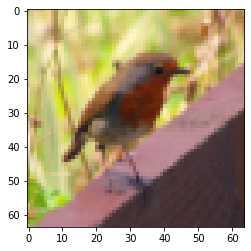

In [70]:
index = 10
plt.imshow(train_set_x_orig[index])
print('y=' + str(train_set_y_orig[:, index]) + ' it is a ' + classes[np.squeeze(train_set_y_orig[:, index])].decode('utf-8'))

* 重塑数据集，将大小(n, length, height, 3)的重塑为(length\*height\*3, n)
* 如下图

![imvector](./深度学习之吴恩达课程作业3/imvectorkiank.png)

In [71]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [72]:
train_set_x_flatten[:5, 0]

array([17, 31, 56, 22, 33], dtype=uint8)

* 数据预处理

In [73]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [74]:
train_set_x[:5, 0]

array([0.06666667, 0.12156863, 0.21960784, 0.08627451, 0.12941176])

### 9.3-使用two layer neural network

In [75]:
n_x, n_h, n_y = train_set_x.shape[0], 7, 1
layer_dims = (n_x, n_h, n_y)
print(layer_dims)

lr = 0.0075
num_epochs = 2500
print_cost=True

(12288, 7, 1)


In [76]:
%%time
parameters, costs = func_two_layer_nn_model(train_set_x, train_set_y_orig, layer_dims, lr, num_epochs, print_cost)

cost after epoch 0: 0.693049735659989
cost after epoch 100: 0.6464320953428849
cost after epoch 200: 0.6325140647912678
cost after epoch 300: 0.6015024920354665
cost after epoch 400: 0.5601966311605748
cost after epoch 500: 0.5158304772764731
cost after epoch 600: 0.47549013139433266
cost after epoch 700: 0.433916315122575
cost after epoch 800: 0.40079775362038844
cost after epoch 900: 0.3580705011323798
cost after epoch 1000: 0.3394281538366413
cost after epoch 1100: 0.30527536361962654
cost after epoch 1200: 0.2749137728213015
cost after epoch 1300: 0.24681768210614827
cost after epoch 1400: 0.1985073503746611
cost after epoch 1500: 0.17448318112556638
cost after epoch 1600: 0.17080762978096792
cost after epoch 1700: 0.11306524562164719
cost after epoch 1800: 0.09629426845937153
cost after epoch 1900: 0.08342617959726863
cost after epoch 2000: 0.07439078704319084
cost after epoch 2100: 0.06630748132267933
cost after epoch 2200: 0.05919329501038171
cost after epoch 2300: 0.05336140348

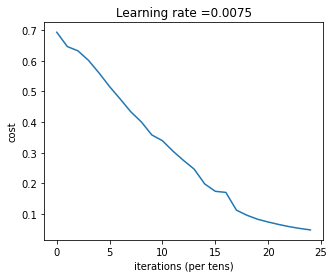

In [77]:
# plot the cost

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(lr))
plt.show()

In [78]:
pred_train = func_predict(train_set_x, train_set_y_orig, parameters)

acc: 1.0


In [79]:
pred_test = func_predict(test_set_x, test_set_y_orig, parameters)

acc: 0.72


### 9.4-使用L层深度神经网络

In [80]:
layer_dims = [train_set_x.shape[0], 7, 1]
print(layer_dims)

lr = 0.0075
num_epochs = 2500
print_cost=True

[12288, 7, 1]


In [81]:
%%time
parameters, costs = func_L_layer_dnn_model(train_set_x, train_set_y_orig, layer_dims, lr, num_epochs, print_cost)

cost after epoch 0: 0.6950464961800915
cost after epoch 100: 0.5892596054583805
cost after epoch 200: 0.5232609173622991
cost after epoch 300: 0.4497686396221906
cost after epoch 400: 0.42090021618838985
cost after epoch 500: 0.3724640306174595
cost after epoch 600: 0.34742051870201895
cost after epoch 700: 0.3171919198737027
cost after epoch 800: 0.26643774347746585
cost after epoch 900: 0.21991432807842595
cost after epoch 1000: 0.14357898893623774
cost after epoch 1100: 0.45309212623221046
cost after epoch 1200: 0.09499357670093511
cost after epoch 1300: 0.08014128076781372
cost after epoch 1400: 0.06940234005536465
cost after epoch 1500: 0.06021664023174592
cost after epoch 1600: 0.05327415758001879
cost after epoch 1700: 0.04762903262098435
cost after epoch 1800: 0.04297588879436871
cost after epoch 1900: 0.039036074365138215
cost after epoch 2000: 0.03568313638049029
cost after epoch 2100: 0.03291526373054677
cost after epoch 2200: 0.030472193059120623
cost after epoch 2300: 0.02

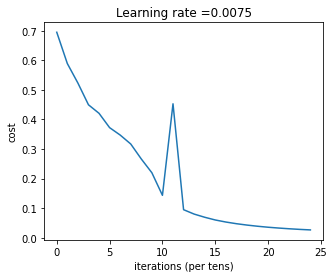

In [82]:
# plot the cost

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(lr))
plt.show()

In [83]:
pred_train = func_predict(train_set_x, train_set_y_orig, parameters)

acc: 1.0


In [84]:
pred_test = func_predict(test_set_x, test_set_y_orig, parameters)

acc: 0.74


In [85]:
layer_dims = [train_set_x.shape[0], 20, 7, 5, 1]
print(layer_dims)

lr = 0.0075
num_epochs = 2500
print_cost=True

[12288, 20, 7, 5, 1]


In [86]:
%%time
parameters, costs = func_L_layer_dnn_model(train_set_x, train_set_y_orig, layer_dims, lr, num_epochs, print_cost)

cost after epoch 0: 0.7717493284237686
cost after epoch 100: 0.6720534400822914
cost after epoch 200: 0.6482632048575212
cost after epoch 300: 0.6115068816101354
cost after epoch 400: 0.5670473268366111
cost after epoch 500: 0.5401376634547801
cost after epoch 600: 0.5279299569455267
cost after epoch 700: 0.46547737717668514
cost after epoch 800: 0.36912585249592794
cost after epoch 900: 0.39174697434805344
cost after epoch 1000: 0.3151869888600617
cost after epoch 1100: 0.2726998441789385
cost after epoch 1200: 0.23741853400268137
cost after epoch 1300: 0.19960120532208644
cost after epoch 1400: 0.18926300388463305
cost after epoch 1500: 0.16118854665827748
cost after epoch 1600: 0.14821389662363316
cost after epoch 1700: 0.13777487812972944
cost after epoch 1800: 0.1297401754919012
cost after epoch 1900: 0.12122535068005211
cost after epoch 2000: 0.1138206066863371
cost after epoch 2100: 0.10783928526254132
cost after epoch 2200: 0.10285466069352679
cost after epoch 2300: 0.100897454

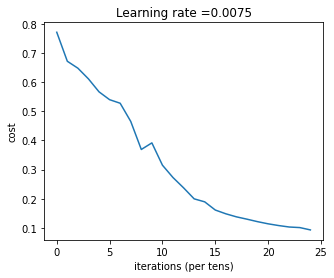

In [87]:
# plot the cost

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(lr))
plt.show()

In [88]:
pred_train = func_predict(train_set_x, train_set_y_orig, parameters)

acc: 0.9856459330143541


In [89]:
pred_test = func_predict(test_set_x, test_set_y_orig, parameters)

acc: 0.8


### 9.5-结果分析

* 让我们看看一些被错误分类的图片

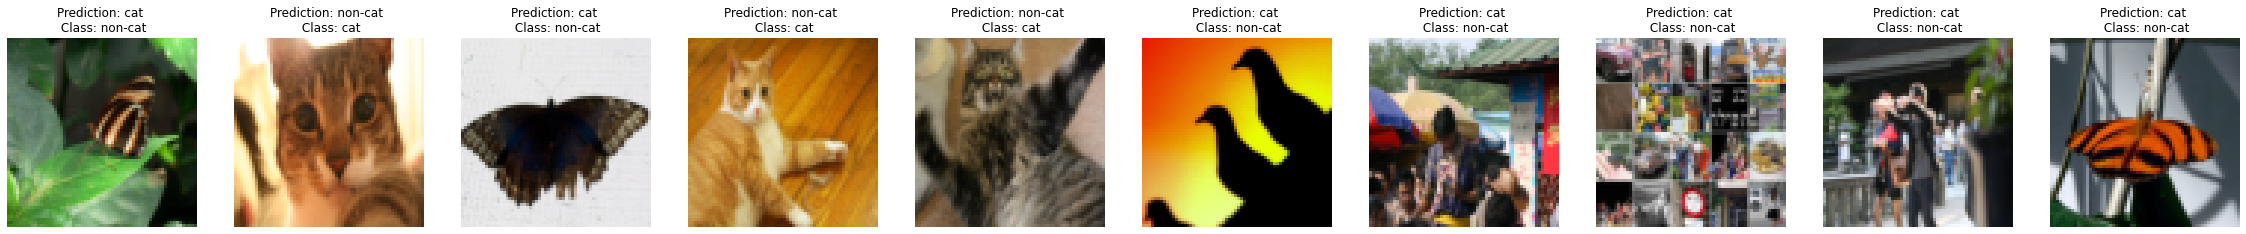

In [90]:
func_print_mislabeled_images(classes, test_set_x, test_set_y_orig, pred_test)

**一些模型在识别上犯错误的地方**
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

### 9.6-识别自己的图片

In [91]:
image_path = './深度学习之吴恩达课程作业1/cat_in_iran.jpg'
my_label_y = [1]
image = np.array(plt.imread(image_path))
image.shape

(1115, 1114, 3)

In [92]:
num_px = train_set_x_orig.shape[1]
my_image = np.array(Image.fromarray(image).resize((num_px, num_px))).reshape((1, num_px*num_px*3)).T
my_image.shape

(12288, 1)

In [93]:
my_pred_image = func_predict(my_image, my_label_y, parameters)
my_pred_image

acc: 1.0


array([[1.]])

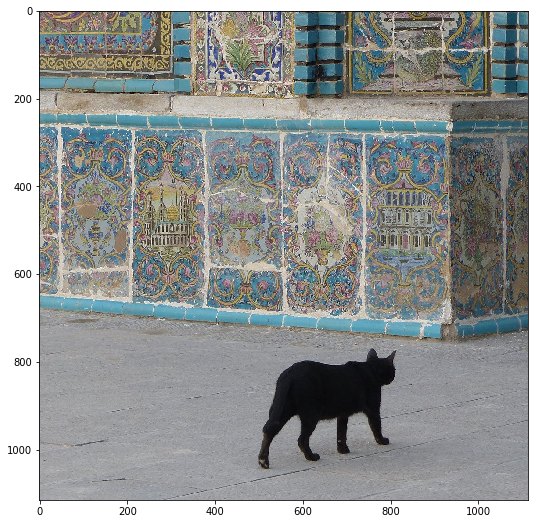

In [94]:
plt.figure(figsize=(9, 9))
plt.imshow(image)

In [95]:
print('y_pred=', np.squeeze(my_pred_image), ", your algorithm predicts a \"" + classes[int(np.squeeze(my_pred_image)),].decode("utf-8") +  "\" picture.")

y_pred= 1.0 , your algorithm predicts a "cat" picture.
